<a href="https://colab.research.google.com/github/rixprakash/DS2002FinalProject/blob/main/finalprojectcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/nw93929/DS2002FinalProject

Cloning into 'DS2002FinalProject'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 98 (delta 38), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (98/98), 16.50 MiB | 9.64 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
outcomes = pd.read_excel('/content/DS2002FinalProject/Data/WinningPartyByCounties.xlsx')
demographics2020 = pd.read_excel('/content/DS2002FinalProject/Data/demographicswingstates2020.xlsx')
demographics2016 = pd.read_excel('/content/DS2002FinalProject/Data/demographicsswingstates2016.xlsx')
demographics2012 = pd.read_excel('/content/DS2002FinalProject/Data/demographicsswingstates2012.xlsx')

In [4]:
outcomes['state'] = outcomes['state'].str.capitalize()
outcomes['county_name'] = outcomes['county_name'].str.capitalize()
outcomes['state'] = outcomes['state'].replace({'North carolina': 'North Carolina'})
outcomes2020 = outcomes[outcomes['year'] == 2020]
outcomes2016 = outcomes[outcomes['year'] == 2016]
outcomes2012 = outcomes[outcomes['year'] == 2012]

In [5]:
demographics2020['County Name'] = demographics2020['County Name'].str.replace(' County', '')
demographics2020['County Name'] = demographics2020['County Name'].str.split().str[0]
demographics2016['County Name'] = demographics2016['County Name'].str.replace(' County', '')
demographics2016['County Name'] = demographics2016['County Name'].str.split().str[0]
demographics2012['County Name'] = demographics2012['County Name'].str.replace(' County', '')
demographics2012['County Name'] = demographics2012['County Name'].str.split().str[0]

In [6]:
merged_df2020 = pd.merge(outcomes2020, demographics2020, left_on=['county_name', 'state'], right_on=['County Name', 'State Name'], how='inner')
merged_df2016 = pd.merge(outcomes2016, demographics2016, left_on=['county_name', 'state'], right_on=['County Name', 'State Name'], how='inner')
merged_df2012 = pd.merge(outcomes2012, demographics2012, left_on=['county_name', 'state'], right_on=['County Name', 'State Name'], how='inner')


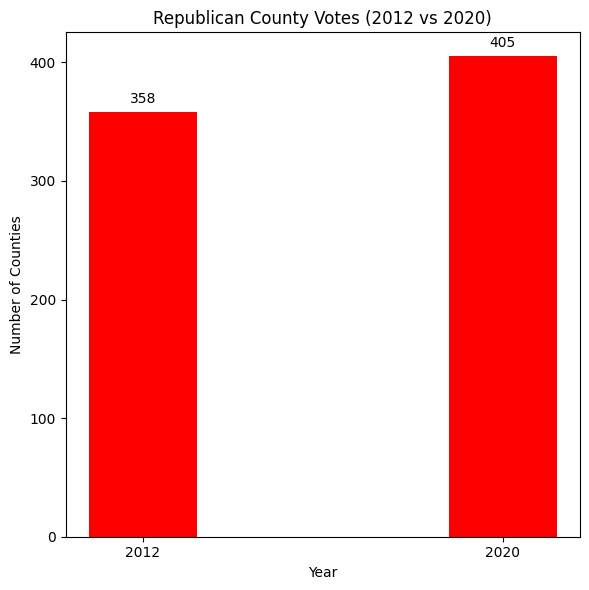

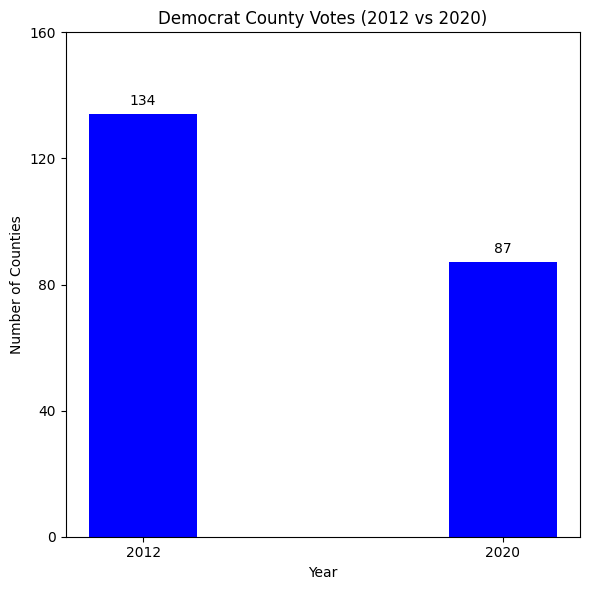

In [7]:
import numpy as np

# Republican Votes
republican_votes = {
    2012: merged_df2012[merged_df2012['party'] == 'REPUBLICAN'].shape[0],
    2020: merged_df2020[merged_df2020['party'] == 'REPUBLICAN'].shape[0]
}

# Generate new x positions closer together
x_positions = np.array([0, 1])  # Reduce spacing between bars

plt.figure(figsize=(6, 6))
bars = plt.bar(x_positions, republican_votes.values(), color='red', width=0.3)  # Narrower x spacing
plt.title('Republican County Votes (2012 vs 2020)')
plt.xlabel('Year')
plt.ylabel('Number of Counties')

# Adjust x-axis ticks to match the new positions
plt.xticks(x_positions, ['2012', '2020'], fontsize=10)

# Reduce the number of ticks on the y-axis
plt.yticks(plt.yticks()[0][::2])  # Show every other tick

# Add county count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Democrat Votes
democrat_votes = {
    2012: merged_df2012[merged_df2012['party'] == 'DEMOCRAT'].shape[0],
    2020: merged_df2020[merged_df2020['party'] == 'DEMOCRAT'].shape[0]
}

plt.figure(figsize=(6, 6))
bars = plt.bar(x_positions, democrat_votes.values(), color='blue', width=0.3)  # Narrower x spacing
plt.title('Democrat County Votes (2012 vs 2020)')
plt.xlabel('Year')
plt.ylabel('Number of Counties')

# Adjust x-axis ticks to match the new positions
plt.xticks(x_positions, ['2012', '2020'], fontsize=10)

# Reduce the number of ticks on the y-axis
plt.yticks(plt.yticks()[0][::2])  # Show every other tick

# Add county count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 2, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


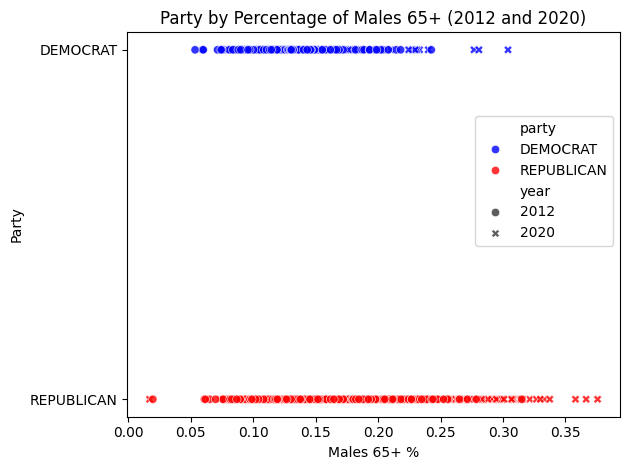

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a 'year' column to differentiate datasets
merged_df2020['year'] = 2020
merged_df2012['year'] = 2012

# Combine the datasets for easier plotting
combined_df = pd.concat([merged_df2020, merged_df2012])

# Define colors for parties
party_colors = {'REPUBLICAN': 'red', 'DEMOCRAT': 'blue'}

# Create the plot
# The 'markers' dictionary now uses numeric keys to match the 'year' column values
sns.scatterplot(
    data=combined_df,
    x='Males 65+ %',
    y='party',
    hue='party',
    palette=party_colors,
    style='year',  # Differentiates years
    markers={2012: 'o', 2020: 'X'},  # Use numeric keys for year values
    alpha=0.8
)

# Add title and labels
plt.title('Party by Percentage of Males 65+ (2012 and 2020)')
plt.xlabel('Males 65+ %')
plt.ylabel('Party')
plt.legend(title="", loc='upper right',bbox_to_anchor=(1, 0.8))
plt.tight_layout()

plt.show()

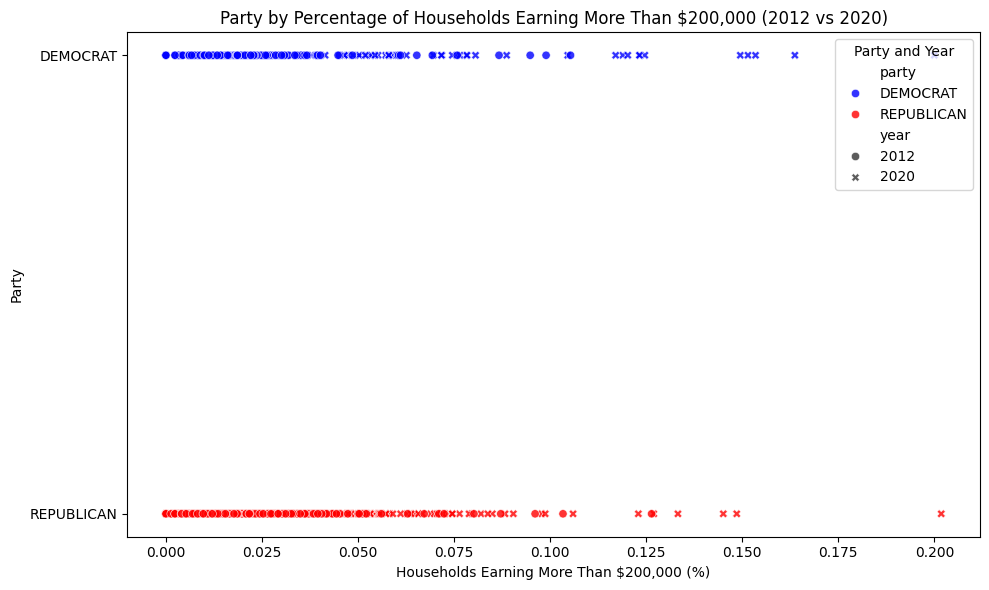

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Plot for 'more than $200,000 %'
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=combined_df,
    x='more than $200,000 %',
    y='party',
    hue='party',
    style='year',
    palette=party_colors,
    alpha=0.8,
    # Change markers dictionary keys to numeric:
    markers={2012: 'o', 2020: 'X'}
)
plt.title('Party by Percentage of Households Earning More Than $200,000 (2012 vs 2020)')
plt.xlabel('Households Earning More Than $200,000 (%)')
plt.ylabel('Party')
plt.legend(title="Party and Year", loc='upper right')
plt.tight_layout()
plt.show()


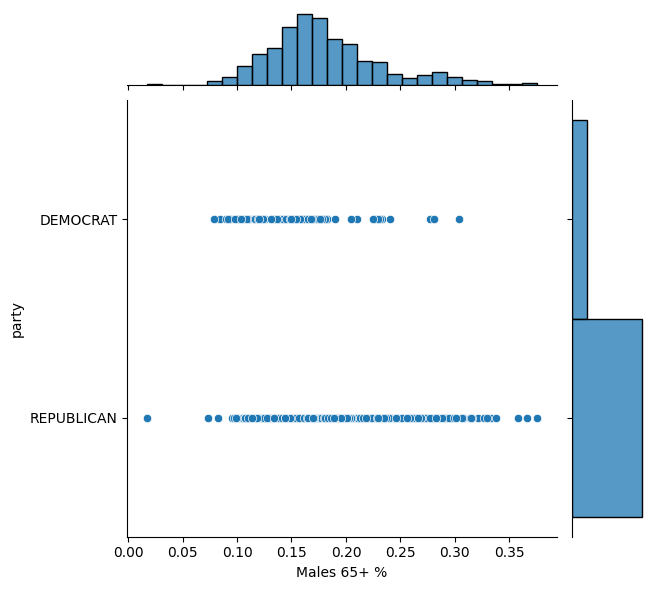

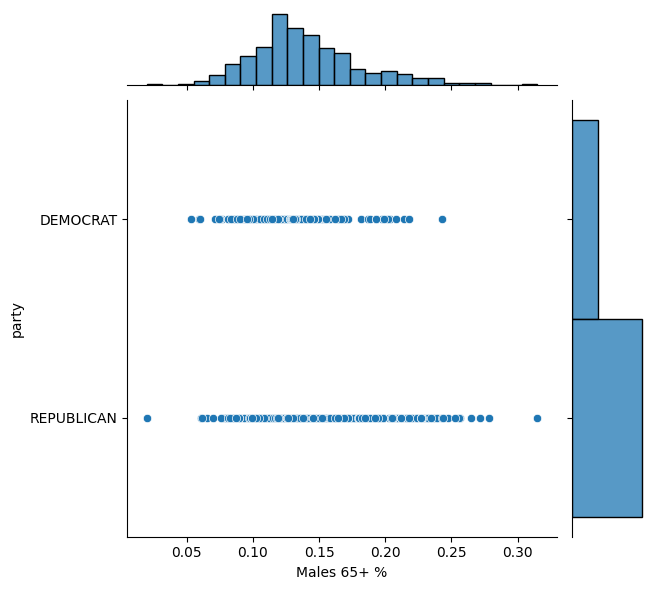

In [11]:
sns.jointplot(x=merged_df2020['Males 65+ %'],y=merged_df2020['party'])
sns.jointplot(x=merged_df2012['Males 65+ %'],y=merged_df2012['party'])


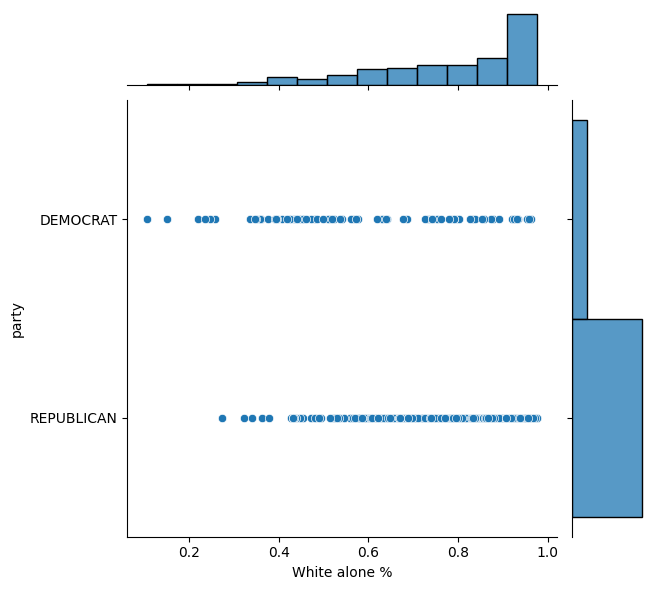

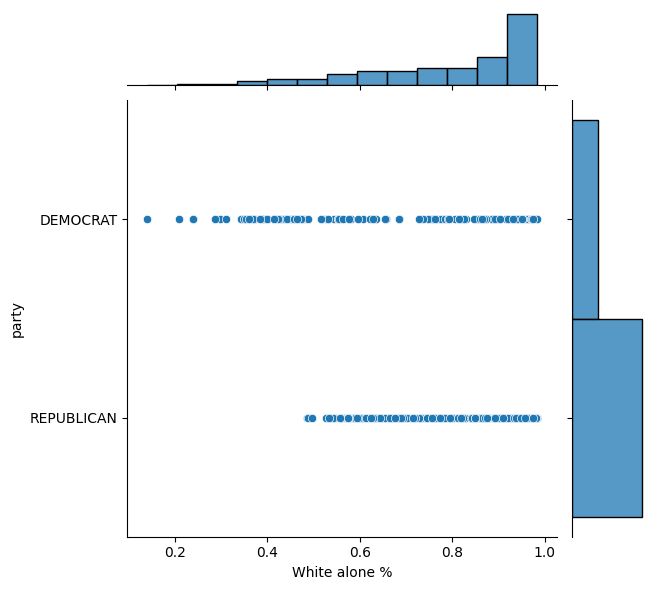

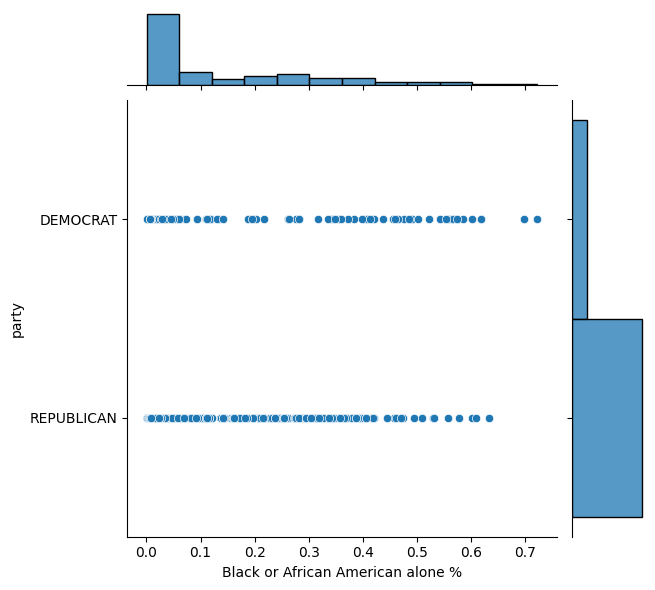

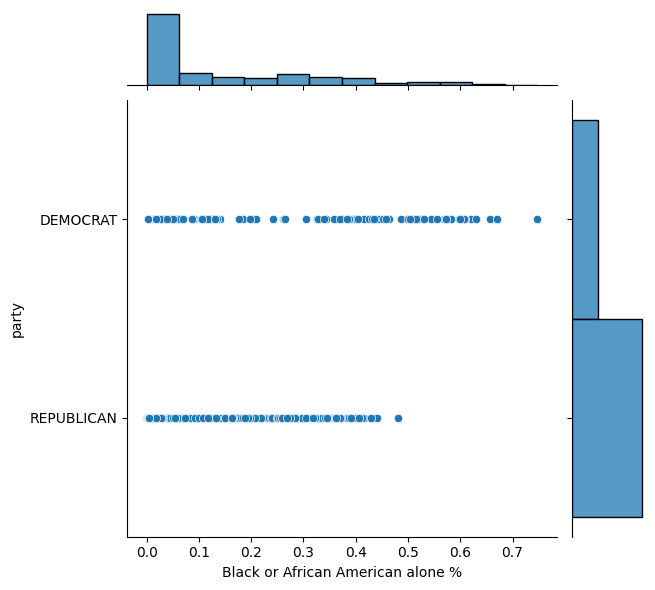

In [15]:
sns.jointplot(x=merged_df2020['White alone %'],y=merged_df2020['party'])
sns.jointplot(x=merged_df2012['White alone %'],y=merged_df2012['party'])
sns.jointplot(x=merged_df2020['Black or African American alone %'],y=merged_df2020['party'])
sns.jointplot(x=merged_df2012['Black or African American alone %'],y=merged_df2012['party'])

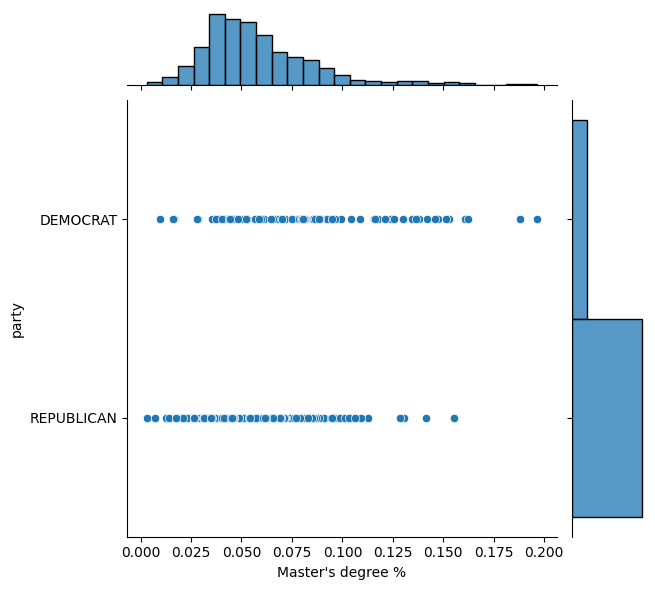

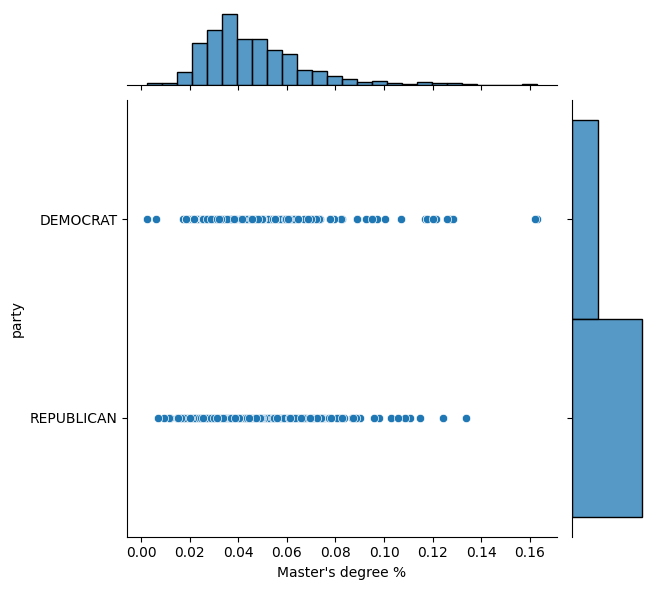

In [14]:
sns.jointplot(x=merged_df2020["Master's degree %"],y=merged_df2020['party'])
sns.jointplot(x=merged_df2012["Master's degree %"],y=merged_df2012['party'])


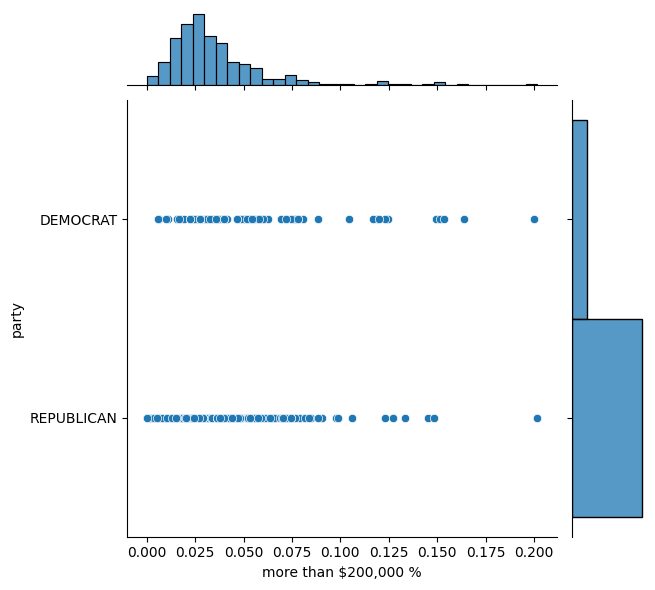

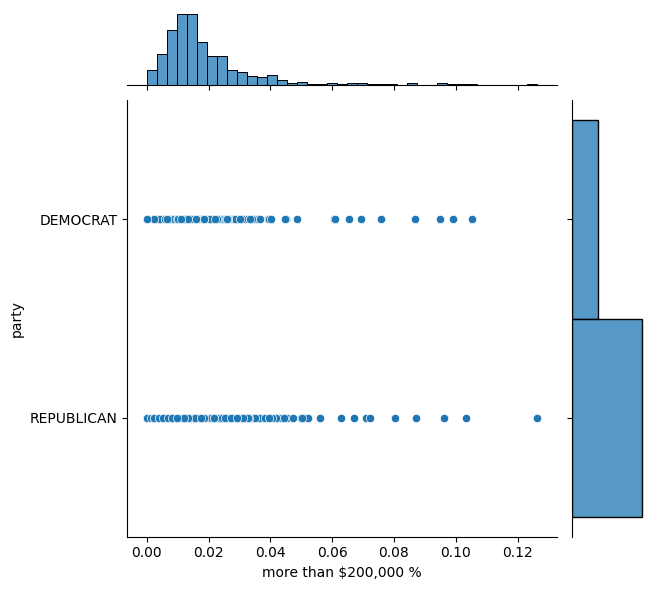

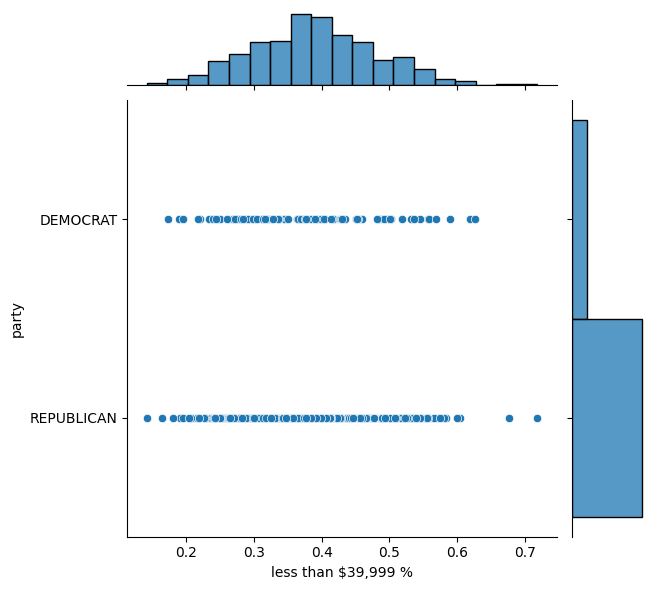

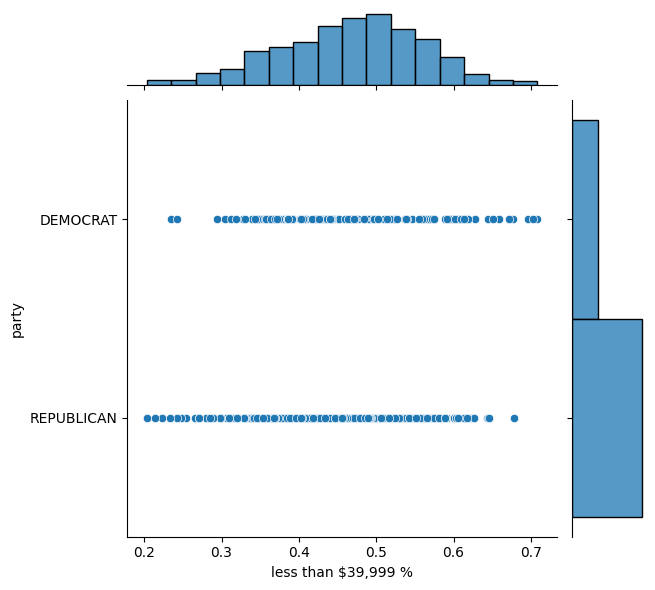

In [13]:
sns.jointplot(x=merged_df2020['more than $200,000 %'],y=merged_df2020['party'])
sns.jointplot(x=merged_df2012['more than $200,000 %'],y=merged_df2012['party'])
sns.jointplot(x=merged_df2020['less than $39,999 %'],y=merged_df2020['party'])
sns.jointplot(x=merged_df2012['less than $39,999 %'],y=merged_df2012['party'])


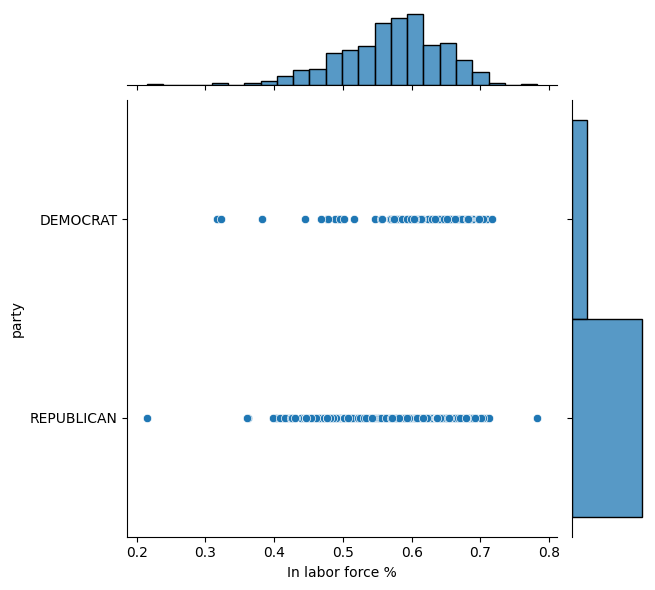

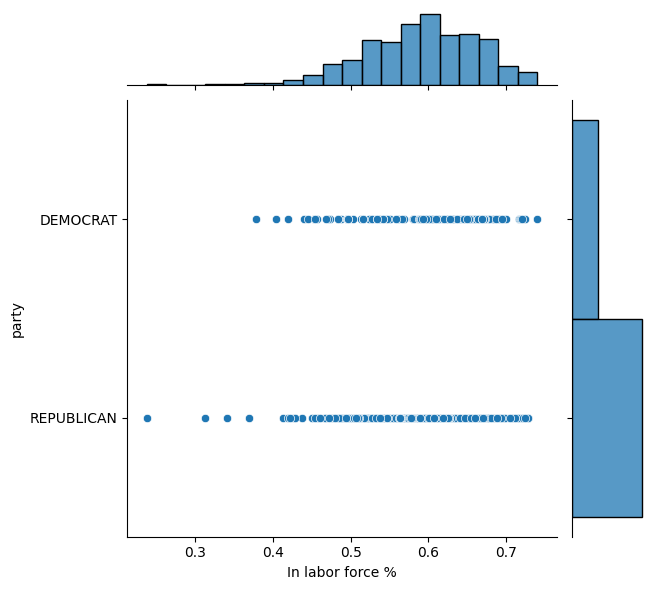

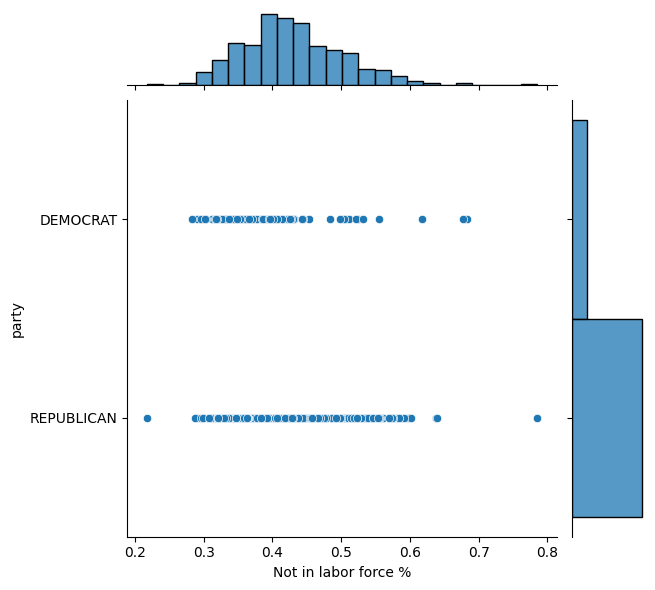

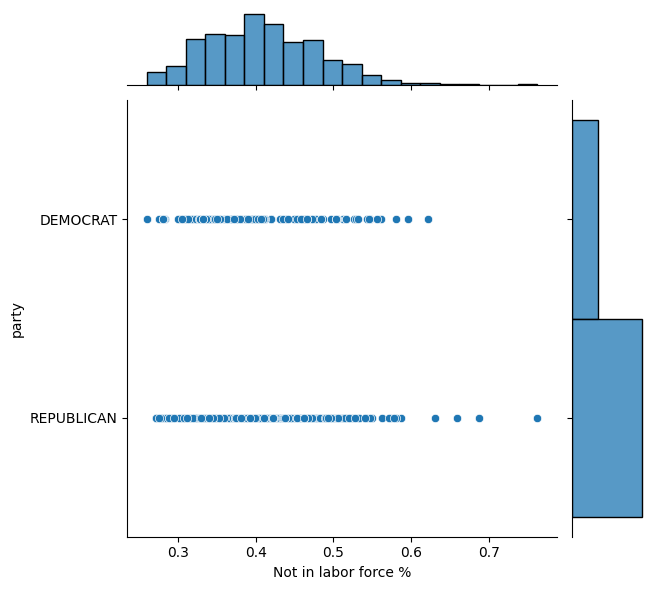

In [12]:
sns.jointplot(x=merged_df2020['In labor force %'],y=merged_df2020['party'])
sns.jointplot(x=merged_df2012['In labor force %'],y=merged_df2012['party'])
sns.jointplot(x=merged_df2020["Not in labor force %"],y=merged_df2020['party'])
sns.jointplot(x=merged_df2012["Not in labor force %"],y=merged_df2012['party'])